In [15]:
__author__ = "me"
__date__ = "2015_10_13"
%pylab inline
import pandas as pd
import numpy as np
# import geopandas as gp
# import datetime
import pylab as plt
import os

from palettable.colorbrewer.qualitative import Paired_11
from palettable.wesanderson import GrandBudapest3_6

from scipy import stats

import networkx as nx
import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
### automatically gets all dataframes from 'finished_data' folder, 
### so you can add more files and run code withoit
### any chage


def getAllFinished(mypath):
    cols = ['ID',
            'category',
            'checkIns',
            'createdAt',
            'description',
            'genCategory',
            'lat','lon',
            'name',
            'photoCount',
            'price',
            'query','rating',
            'tags','tileID',
            'time','tips',
            'users','verified']
    
    files = [ f for f in os.listdir(mypath) if (os.path.isfile(os.path.join(mypath,f)) and ('.csv' in f)) ]
#     print files
    return {k.replace('.csv',''):pd.read_csv(os.path.join(mypath,k))[cols] for k in files}

In [6]:
dfs = getAllFinished('/Users/casy/Dropbox/CUSP/project/Square_cities/data/finished_data/')

In [7]:
toKS = {}

for k,v in dfs.iteritems():
    v = v[v.checkIns>100]
    v['r'] = v.users/v.checkIns
    v = v[v.r<=1]
    toKS[k]=v



/Users/casy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


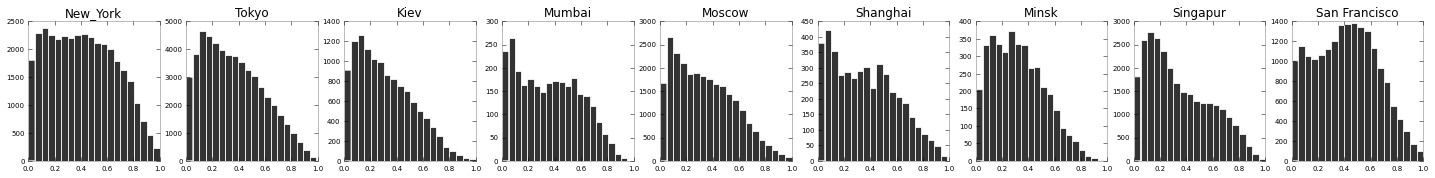

In [8]:
fig, axes = plt.subplots(1,len(dfs.keys()))
fig.set_size_inches(25, 2.5)

for i, (k,s) in enumerate(list(toKS.iteritems())):
#     print k
    axes[i].tick_params(axis='both', which='major', labelsize=7)
    axes[i].set_xlim([0, 1])
    axes[i].set_title(k, fontsize=12)
    s.r.hist(ax=axes[i], color='k', alpha=.8, grid=0, bins=20)
    
plt.savefig('img/ratio_comp.png', bbox_inches='tight')


In [9]:
results =[]
alpha = .05

cities = list(toKS.keys())
for i,city1 in enumerate(cities):
    for city2 in cities[i+1:]:
        results.append({'city1':city1,'city2':city2, 'ks':stats.ks_2samp(toKS[city1].r,toKS[city2].r)[1]})
r = pd.DataFrame(results)
r['result'] = r['ks']< alpha
r[r['city1']=='New_York']

,city1,city2,ks,result
0,New_York,Tokyo,2.895156e-215,True
1,New_York,Kiev,4.408501e-261,True
2,New_York,Mumbai,2.248665e-15,True
3,New_York,Moscow,1.969995e-212,True
4,New_York,Shanghai,7.956583e-28,True
5,New_York,Minsk,8.937859e-104,True
6,New_York,Singapur,2.789095e-283,True
7,New_York,San Francisco,1.155402e-12,True


In [14]:
# Trying to implement Anderson-D
# stats.ks_2samp(toKS['Moscow'],toKS['Minsk'])[1]

In [11]:
cats = ['Travel & Transport',
 'Shop & Service',
 'Arts & Entertainment',
 'College & University',
 'Outdoors & Recreation',
 'Professional & Other Places',
 'Food',
 'Event',
 'Nightlife Spot',
 'Residence']


results =[]
alpha = .05

cities = list(toKS.keys())
for i,city1 in enumerate(cities):
    for city2 in cities[i+1:]:
        df1= toKS[city1]
        df2= toKS[city2]
        for cat in cats:
            if len(df1[df1.genCategory==cat])>30 and len(df2[df2.genCategory==cat])>30:
                results.append({'city1':city1,'city2':city2,'category':cat, 'ks':stats.ks_2samp(df1[df1.genCategory==cat].r,df2[df2.genCategory==cat].r)[1]})
r = pd.DataFrame(results)
r['result'] = r['ks']< alpha
r[~r.result]

,category,city1,city2,ks,result
21,College & University,New_York,Mumbai,0.326559,False
23,Professional & Other Places,New_York,Mumbai,0.064675,False
26,Residence,New_York,Mumbai,0.307640,False
32,Professional & Other Places,New_York,Moscow,0.171996,False
40,Outdoors & Recreation,New_York,Shanghai,0.216311,False
66,College & University,New_York,San Francisco,0.857878,False
71,Residence,New_York,San Francisco,0.726527,False
83,Arts & Entertainment,Tokyo,Mumbai,0.288786,False
84,College & University,Tokyo,Mumbai,0.469730,False
110,Arts & Entertainment,Tokyo,Minsk,0.101811,False


In [12]:
# percentage failed
1.0*len(r[~r.result])/len(r)

0.14814814814814814

In [13]:
# most different city
fails = r[~r.result].groupby(['city1','city2']).size().reset_index().sort_values(0, ascending=0).reset_index().rename(columns={0:'fails'})
fails

,index,city1,city2,fails
0,0,Kiev,Minsk,5
1,8,Moscow,Minsk,4
2,13,Mumbai,San Francisco,4
3,12,Mumbai,Moscow,4
4,14,Mumbai,Shanghai,3
5,17,New_York,Mumbai,3
6,11,Mumbai,Minsk,2
7,21,Shanghai,San Francisco,2
8,18,New_York,San Francisco,2
9,15,Mumbai,Singapur,2


In [44]:
edges =  []

def getEdge(x):
    edges.append((x.city1, x.city2,{'weight':1.0/100*(x.fails*x.fails*x.fails)}))
    
fails.apply(getEdge, axis=1)

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
dtype: object

In [45]:
G=nx.Graph()
G.add_edges_from(edges)

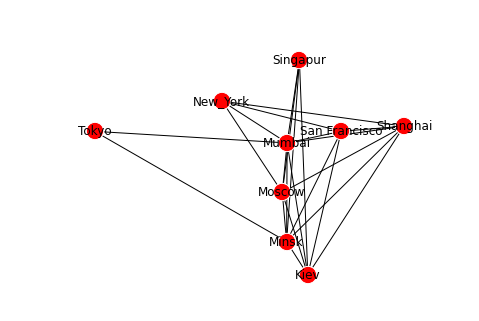

In [46]:
pos=nx.spring_layout(G)
nx.draw(G,pos=pos)
nx.draw_networkx_labels(G, pos);
plt.savefig('/Users/casy/Dropbox/CUSP/project/Square_cities/presentation/graph.eps')

['New_York',
 'Tokyo',
 'Kiev',
 'Mumbai',
 'Moscow',
 'Shanghai',
 'Minsk',
 'Singapur',
 'San Francisco']